In [1]:
%matplotlib inline

In [26]:
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import mplscience
from moscot.problems.time import TemporalProblem
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300)

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

2023-01-25 11:34:55.824820: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 11:35:07.680604: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 11:35:08.606468: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 11:35:26.143521: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or dire

['default', 'despine']


In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/plots"

In [6]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")


In [9]:
adata2 = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/adata_driver.h5ad")

In [27]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [28]:
adata2.obs["refinement"] = tp0.adata.obs["refinement"]

In [6]:
paths = os.listdir(path)
paths = [os.path.join(path, el) for el in paths if "peaks" in el]

In [7]:
paths

['/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/drivers_beta_peaks.csv',
 '/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/driver_eps_peaks.csv',
 '/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/driver_delta_peaks.csv',
 '/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/drivers_fev_delta_peaks.csv',
 '/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/driver_eps_prog_peaks.csv',
 '/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/drivers_alpha_peaks.csv']

# Fev+ Delta

In [4]:
df_fd = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/drivers_fev_delta_peaks.csv")

In [12]:
peaks_fd = df_fd["Unnamed: 0"][:15].values

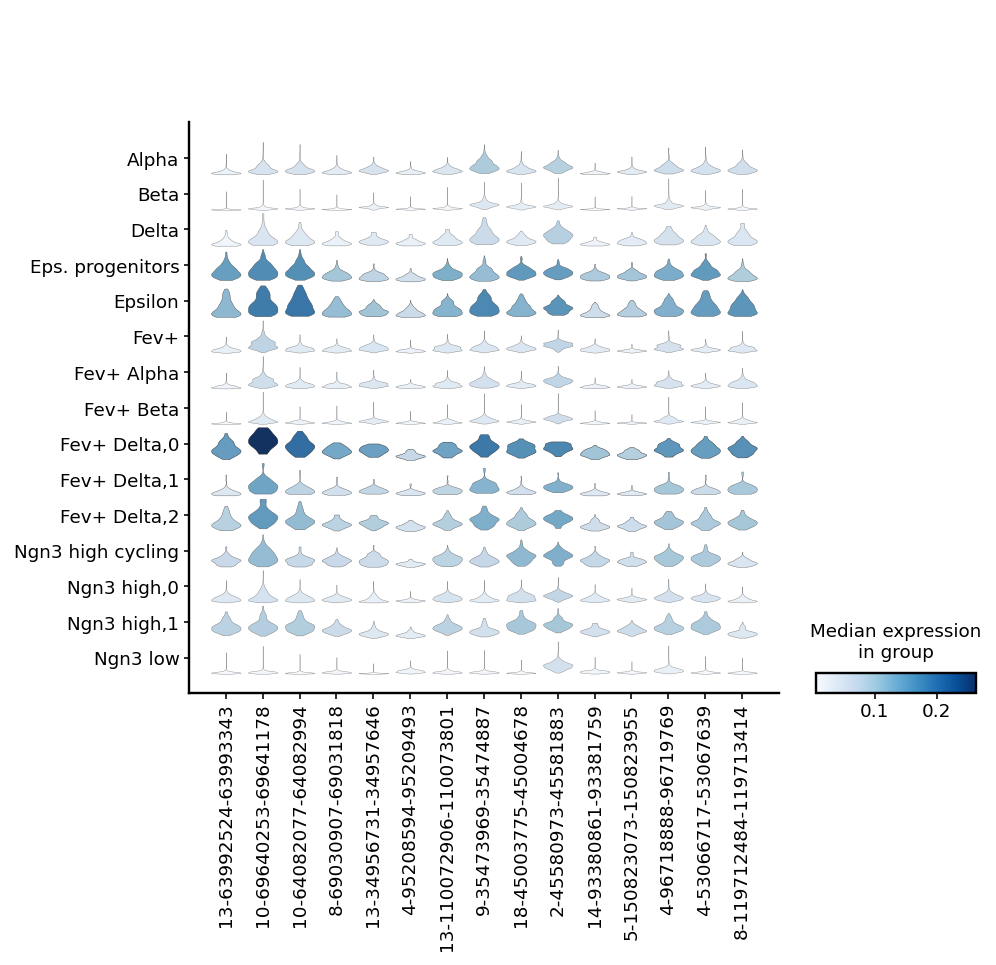

In [29]:
sc.pl.stacked_violin(adata2, peaks_fd, "refinement", layer="ATAC_imputed")

# Eps. progenitors

In [22]:
df_ep = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features/driver_eps_prog_peaks.csv")


In [23]:
peaks_ep = df_ep["Unnamed: 0"][:15].values

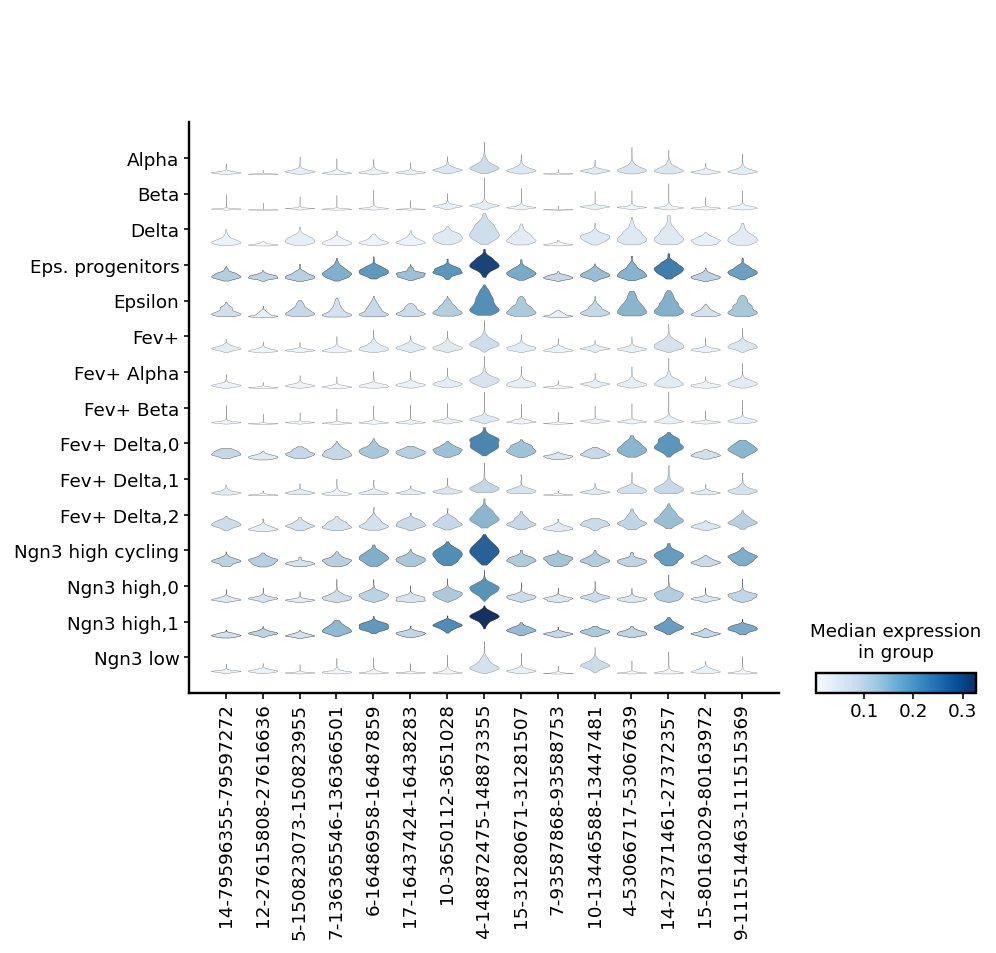

In [30]:
sc.pl.stacked_violin(adata2, peaks_ep, "refinement", layer="ATAC_imputed")